In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Столбцы таблицы:

    RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
    CustomerId — идентификатор клиента
    Surname — фамилия клиента
    CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
    Geography — страна клиента (банк международный)
    Gender — пол клиента
    Age — возраст клиента
    Tenure — сколько лет клиент пользуется услугами банка
    Balance — баланс на счетах клиента в банке
    NumOfProducts — количество услуг банка, которые приобрёл клиент
    HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
    IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
    EstimatedSalary — предполагаемая заработная плата клиента
    Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

Итак, банк обращается к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов, но для этого ему необходимо, чтобы вы выяснили основные причины оттока клиентов. Иными словами, нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

После разведывательного анализа, с целью выявления наиболее важных признаков оттока, банк сможет построить модель машинного обучения, которая будет прогнозировать уход клиента. 

### ЗАДАНИЯ


##### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

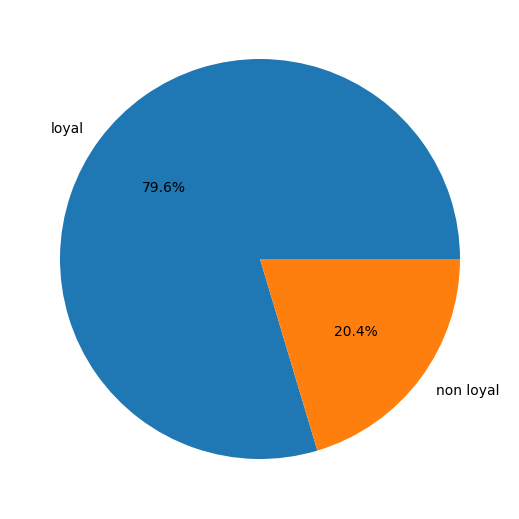

In [171]:
churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop('RowNumber', axis=1)
churn_data[['Exited', 'EstimatedSalary', 'IsActiveMember', 'HasCrCard', 'NumOfProducts']] = \
churn_data[['Exited', 'EstimatedSalary', 'IsActiveMember', 'HasCrCard', 'NumOfProducts']].astype('category')
churn_data['Exited'] = churn_data['Exited'].cat.rename_categories({
    1: 'non loyal',
    0: 'loyal'
})
loyalty_assessment = churn_data['Exited'].value_counts()
#display(loyalty_assessment)
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    loyalty_assessment,
    labels=loyalty_assessment.index,
    autopct='%.1f%%'
);


Вывод:

Подавляющее большинство клиентов лояльны к банку.

##### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

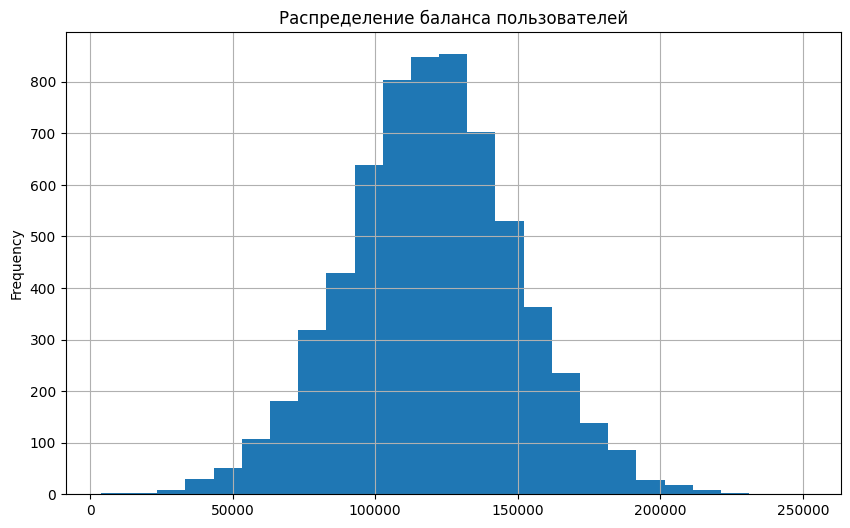

In [160]:
mask1 = churn_data['Balance'] > 2500
churn_data_balance = churn_data[mask1]
churn_data_balance['Balance'].plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение баланса пользователей',
    grid = True,
    bins=25
);

Выводы:
Большинство пользователей из данной выборки имеют на балансе от 80 до 150 тысяч.
Самая популярная сумма около 125 000. Только у единиц на балансе есть более 200 000.

##### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

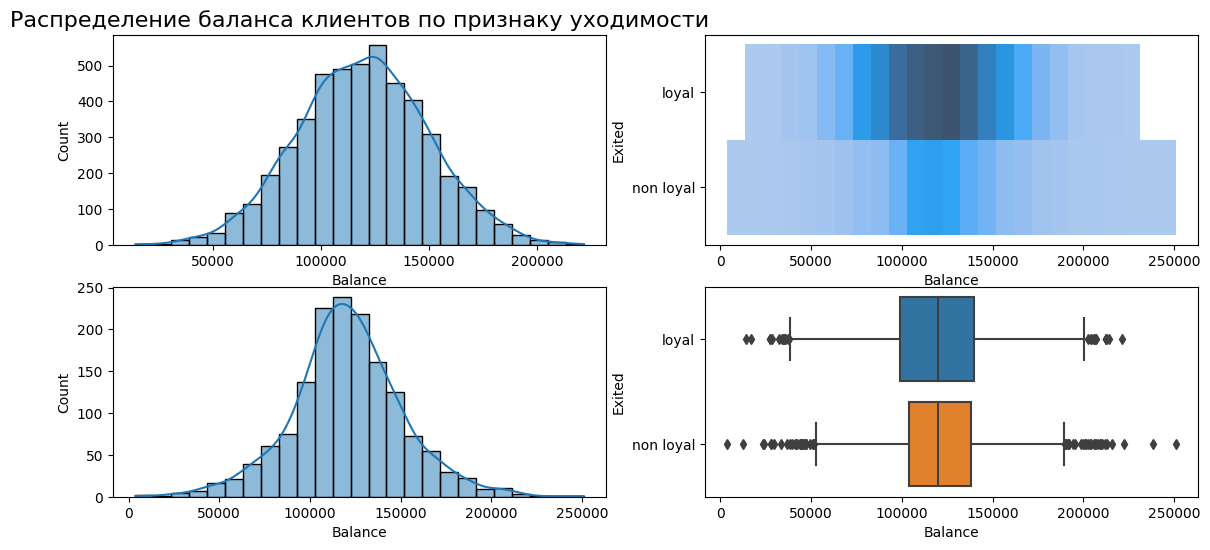

In [161]:
churn_data_balance_loyal = churn_data_balance[churn_data_balance['Exited'] == 'loyal']
churn_data_balance_non_loyal = churn_data_balance[churn_data_balance['Exited'] == 'non loyal']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))
axes[0][0].set_title('Распределение баланса клиентов по признаку уходимости', fontsize=16)
sns.histplot(
    data=churn_data_balance_loyal,
    x='Balance',
    bins=25,
    kde=True,
    ax=axes[0][0]
);

sns.histplot(
    data=churn_data_balance_non_loyal,
    x='Balance',
    bins=25,
    kde=True,
    ax=axes[1][0]
);

sns.histplot(
    data=churn_data_balance,
    x='Balance',
    y='Exited',
    bins=25,
    ax=axes[0][1]
);

sns.boxplot(
    data=churn_data_balance,
    y='Exited',
    x='Balance',
    orient='h',
    ax=axes[1][1]
);

Выводы:
суммы на счетах уходимых и лояльных клиентов практически никак не различаются, между этими признаками взаимосвязь не прослеживатся. Причины уходимости не связаны с количеством средств на балансе.

##### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

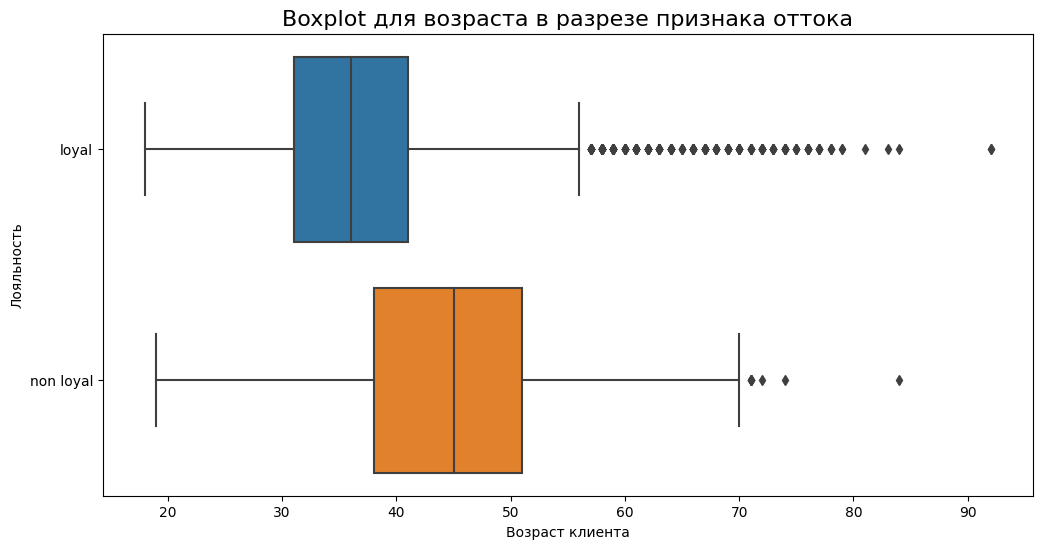

In [162]:
fig = plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(
    data=churn_data_balance, 
    x='Age', 
    y='Exited',
    orient='h'
    )
boxplot.set_title('Boxplot для возраста в разрезе признака оттока', fontsize=16)
boxplot.set_xlabel('Возраст клиента')
boxplot.set_ylabel('Лояльность');

Выводы:

Больше всего потенциальных выбросов в группе лояльных клиентов. Банку следует обратить особое внимание на возрастную категорию 40-50 лет, так как в ней наибольшее количество ушедших клиентов.
    

##### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

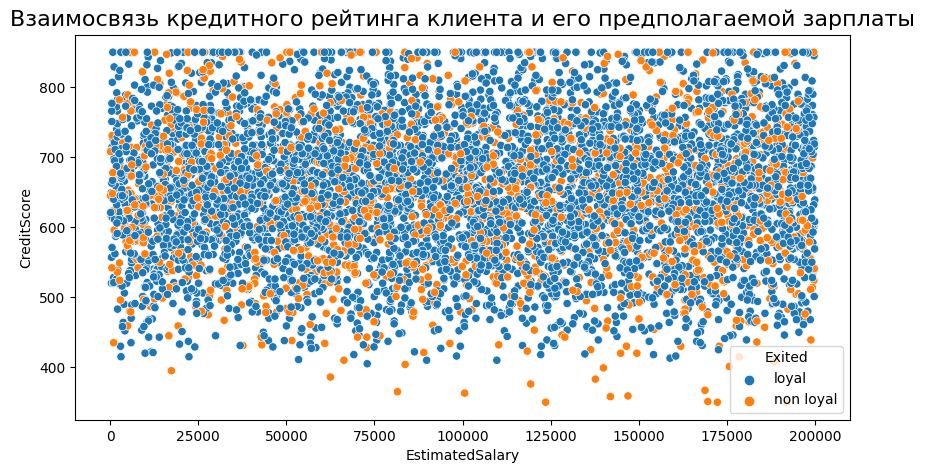

In [163]:
fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=churn_data_balance,
    x='EstimatedSalary',
    y='CreditScore',
    hue='Exited',
)
scatterplot.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты', 
                      fontsize=16);

Выводы:

Взаимосвязь кредитного рейтинга и предполагаемой зарплаты не прослеживается.

##### 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [164]:
churn_data_source = pd.read_csv('data/churn.csv')
churn_data_new = churn_data_source.drop('RowNumber', axis=1)
churn_data_gender = churn_data_new[['Gender', 'Exited']].groupby(
    by='Gender', as_index=False).mean().round(2)

fig = px.bar(
    data_frame=churn_data_gender, #датафрейм
    x="Gender", 
    y="Exited", 
    color='Gender', 
    text = 'Exited', 
    orientation='v', 
    height=500, #высота
    width=500, #ширина
    title='Кто чаще уходит, мужчины или женщины?', #заголовок
)

fig.show()

Выводы:

Женщины уходят почти вдвое чаще, чем мужчины.

##### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

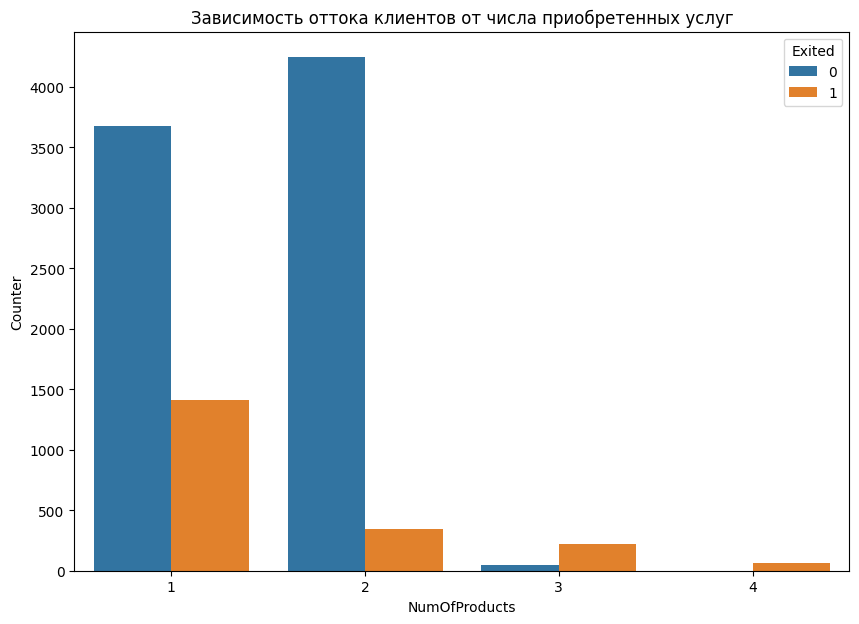

In [165]:
churn_data_new['Counter'] = 1
churn_group = churn_data_new[['NumOfProducts', 'Exited','Counter']].groupby(
    by = ['NumOfProducts', 'Exited'], as_index=False
).sum()

fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=churn_group,
    x='NumOfProducts',
    y='Counter',
    hue='Exited',
)
barplot.set_title('Зависимость оттока клиентов от числа приобретенных услуг');


Выводы:

Наилучшая ситуация по клиентам с двумя подключенными услугами. Клиенты с большим количеством чем 2 услуги покидают банк. В абсолютных значениях самый большой отток клиентовс одной услугой.

##### 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

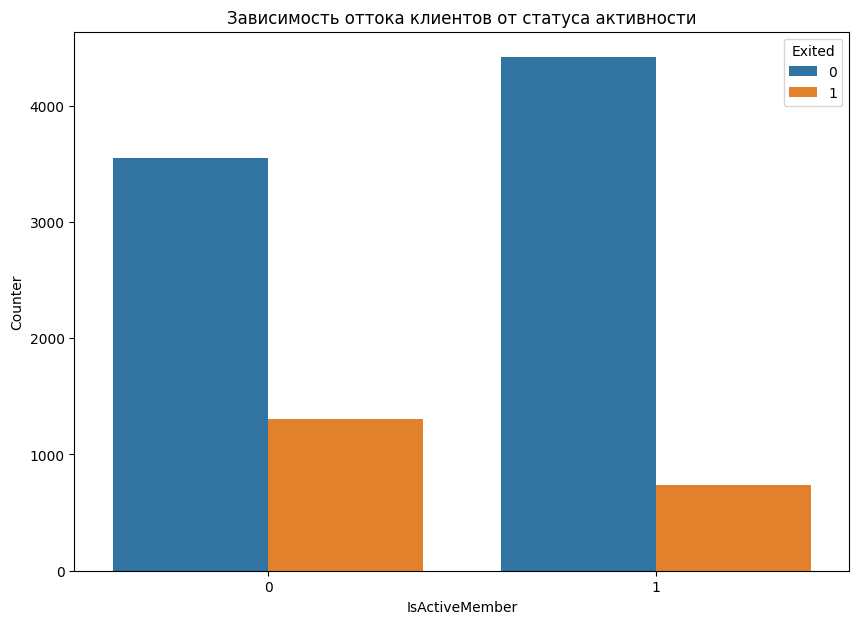

In [166]:
churn_group = churn_data_new[['IsActiveMember', 'Exited','Counter']].groupby(
    by = ['IsActiveMember', 'Exited'], as_index=False
).sum()
#display(churn_group)
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=churn_group,
    x='IsActiveMember',
    y='Counter',
    hue='Exited',
)
barplot.set_title('Зависимость оттока клиентов от статуса активности');

Выводы:

Больший отток случается при нулевом статусе активности. Чтобы снизить отток, нужно предложить клиенту лучшие условия по пользованию своими продуктами. Например, бесплатное обслуживание карт, повышенный кэш бек, проценты на остаток по счету. 

##### 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [167]:
# Долю по стране вычислю как среднее арифметическое признака Exited, 
# сгруппированное по странам
share_by_country = churn_data_new[['Geography', 'Exited']].groupby(
    ['Geography'], as_index=False).mean()
share_by_country

#строим график
fig = px.choropleth(
    data_frame=share_by_country, #DataFrame
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет
    #animation_frame="date", #анимационный бегунок
    #range_color=[0, 30e6], #диапазон цвета
    title='Тепловая карта по доле ушедших клиентов', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show()
#

Выводы:

Самая высокая доля оттока клиентов в Германии (32%). Это может быть связано с более высокой конкуренцией банковского сектора в этой стране.

##### 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга. 
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,27.5,20.8,13.7,16.8,13.2,23.3,24.1,12.8,19.6,27.1,25.5
Fair,21.7,21.6,21.3,21.6,19.7,20.7,23.6,17.1,20.9,19.0,20.5
Good,20.4,20.4,18.7,20.6,19.5,21.4,18.3,19.2,15.2,19.5,19.8
Poor,22.6,25.9,21.2,21.2,23.3,19.9,18.0,15.1,21.5,25.1,16.9
Very_Poor,44.4,25.4,15.2,28.6,29.3,14.9,22.5,20.6,25.4,23.0,33.3


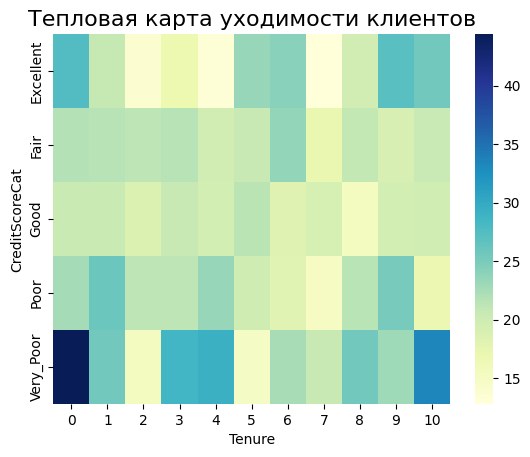

In [177]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data_new['CreditScoreCat'] = churn_data_new['CreditScore'].apply(get_credit_score_cat)

table_tenure = churn_data_new.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    #fill_value=0
).round(3)*100
display(table_tenure)
heatmap = sns.heatmap(data=table_tenure, cmap='YlGnBu')
heatmap.set_title('Тепловая карта уходимости клиентов', fontsize=16);

Выводы:

Наиболее часто банк покидают клиенты категории Very_Poor со сроком использования услуг менее года. В целом на всем интервале использования услуг категория Very_Poor является лидером по уходимости. Клиенты категории Excellent токже подвержены уходимости, хоть и в меньшей степени. Особенно на интервалах до 1 года и 9-10 лет.
Наиболее стабильной в плане удержания клиентов является категория Good.